In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv(r'E:\DataAnalyst2.csv')

In [59]:
data

,JobID,Job Title,Salary Estimate,NumberofReviews,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,No.OFApplicants
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),86,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE,728
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),192,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,378
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),84,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,354
3,3,Data Analyst,$37K-$66K (Glassdoor est.),116,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,108
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),196,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE,524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),66,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,290
2252,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),70,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1,402
2253,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),144,-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1,75
2254,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),145,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1,737


# Many rows contain negative values such as(-1,1,0)

In [60]:
len(data.columns)

17

In [61]:
data.columns

Index(['JobID', 'Job Title', 'Salary Estimate', 'NumberofReviews', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'No.OFApplicants'],
      dtype='object')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   JobID              2256 non-null   int64  
 1   Job Title          2256 non-null   object 
 2   Salary Estimate    2256 non-null   object 
 3   NumberofReviews    2256 non-null   int64  
 4   Rating             2256 non-null   float64
 5   Company Name       2255 non-null   object 
 6   Location           2256 non-null   object 
 7   Headquarters       2256 non-null   object 
 8   Size               2256 non-null   object 
 9   Founded            2256 non-null   object 
 10  Type of ownership  2256 non-null   object 
 11  Industry           2256 non-null   object 
 12  Sector             2256 non-null   object 
 13  Revenue            2256 non-null   object 
 14  Competitors        2256 non-null   object 
 15  Easy Apply         2256 non-null   object 
 16  No.OFApplicants    2256 

In [63]:
#checking null values
data.isna().sum()

JobID                0
Job Title            0
Salary Estimate      0
NumberofReviews      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
No.OFApplicants      0
dtype: int64

# As we can see many rows values contain -1,-1.0,"-1",  so we will replace with null values

In [64]:
data = data.replace("-1", np.nan)
data = data.replace(-1, np.nan)
data = data.replace(-1.0, np.nan)

In [65]:
#checking once again null values after replacing all negative values to null
data.isna().sum()

JobID                   0
Job Title               0
Salary Estimate         1
NumberofReviews         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     164
Industry              354
Sector                354
Revenue               163
Competitors          1735
Easy Apply           2176
No.OFApplicants         0
dtype: int64

# 3.List of valuable information (Example: Job Title wise Application Count) can be shown from this data. 

In [66]:
#Number of Job Title are thier in current dataset
data["Job Title"].nunique()

1272

In [67]:
data["Job Title"].value_counts()[:30]

Data Analyst                               406
Senior Data Analyst                         90
Junior Data Analyst                         30
Business Data Analyst                       28
Sr. Data Analyst                            21
Data Analyst Junior                         17
Data Quality Analyst                        17
Data Analyst II                             17
Data Governance Analyst                     16
Lead Data Analyst                           15
Data Reporting Analyst                      13
Financial Data Analyst                      12
Data Analyst III                            11
Data Analyst I                              11
Sr Data Analyst                              9
Marketing Data Analyst                       9
Data Management Analyst                      8
Data Warehouse Analyst                       8
Technical Data Analyst                       7
SQL Data Analyst                             7
Data Science Analyst                         7
Healthcare Da

# Similar job title are named different ex: Senior Data Analyst & Sr. Data Analyst so we weill rename

In [68]:
data["Job Title"] = data["Job Title"].replace("Sr. Data Analyst", "Senior Data Analyst")
data["Job Title"] = data["Job Title"].replace("Sr Data Analyst", "Senior Data Analyst")
data["Job Title"] = data["Job Title"].replace("Data Analyst Senior", "Senior Data Analyst")

In [69]:
data["Job Title"].nunique()


1269

In [70]:
data["Job Title"] = data["Job Title"].replace("Jr. Data Analyst", "Data Analyst")
data["Job Title"] = data["Job Title"].replace("Jr Data Analyst", "Data Analyst")
data["Job Title"] = data["Job Title"].replace("Data Analyst Junior", "Data Analyst")

In [71]:
data["Job Title"].nunique()

1266

In [72]:
#As you can see once the title we remaned the number of job title number are increased
data["Job Title"].value_counts()[:30]

Data Analyst                                                                        426
Senior Data Analyst                                                                 121
Junior Data Analyst                                                                  30
Business Data Analyst                                                                28
Data Analyst II                                                                      17
Data Quality Analyst                                                                 17
Data Governance Analyst                                                              16
Lead Data Analyst                                                                    15
Data Reporting Analyst                                                               13
Financial Data Analyst                                                               12
Data Analyst I                                                                       11
Data Analyst III                

In [73]:
#Number of Job Applicants according to Job Titile
data[['Job Title','No.OFApplicants']].head(10)

,Job Title,No.OFApplicants
0,"Data Analyst, Center on Immigration and Justic...",728
1,Quality Data Analyst,378
2,"Senior Data Analyst, Insights & Analytics Team...",354
3,Data Analyst,108
4,Reporting Data Analyst,524
5,Data Analyst,329
6,Business/Data Analyst (FP&A),129
7,Data Science Analyst,823
8,Data Analyst,280
9,"Data Analyst, Merchant Health",300


In [84]:
data['Salary Estimate']

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
2251    $78K-$104K (Glassdoor est.)
2252    $78K-$104K (Glassdoor est.)
2253    $78K-$104K (Glassdoor est.)
2254    $78K-$104K (Glassdoor est.)
2255    $78K-$104K (Glassdoor est.)
Name: Salary Estimate, Length: 2256, dtype: object

In [85]:
data['Salary Estimate'].isna().sum()

1

In [88]:
data['Salary Estimate'] = data['Salary Estimate'].dropna()

In [124]:
data['Salary Estimate'][:5]

0    $37K-$66K (Glassdoor est.)
1    $37K-$66K (Glassdoor est.)
2    $37K-$66K (Glassdoor est.)
3    $37K-$66K (Glassdoor est.)
4    $37K-$66K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [91]:
data[data['Salary Estimate'].isna()]

,JobID,Job Title,Salary Estimate,NumberofReviews,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,No.OFApplicants
2151,2149,Configuration/Data Management Analyst III,NaN,74,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),NaN,NaN,621


In [94]:
data = data.drop(2151)

In [95]:
data['Salary Estimate'].isna().sum()

0

In [102]:
data["Salary Minimum"] = data["Salary Estimate"].str.lstrip("$").str[:3].str.replace("K", "").str.strip().astype("float")
data["Salary Maximum"] = data['Salary Estimate'].str[6:10].str.replace('K','').str.lstrip('$').str.strip().astype('float')

In [103]:
data[["Salary Estimate", "Salary Maximum", "Salary Minimum"]]

,Salary Estimate,Salary Maximum,Salary Minimum
0,$37K-$66K (Glassdoor est.),66.0,37.0
1,$37K-$66K (Glassdoor est.),66.0,37.0
2,$37K-$66K (Glassdoor est.),66.0,37.0
3,$37K-$66K (Glassdoor est.),66.0,37.0
4,$37K-$66K (Glassdoor est.),66.0,37.0
...,...,...,...
2251,$78K-$104K (Glassdoor est.),104.0,78.0
2252,$78K-$104K (Glassdoor est.),104.0,78.0
2253,$78K-$104K (Glassdoor est.),104.0,78.0
2254,$78K-$104K (Glassdoor est.),104.0,78.0


In [123]:
data[["Job Title", "Salary Maximum", "Salary Minimum"]].head(10)

,Job Title,Salary Maximum,Salary Minimum
0,"Data Analyst, Center on Immigration and Justic...",66.0,37.0
1,Quality Data Analyst,66.0,37.0
2,"Senior Data Analyst, Insights & Analytics Team...",66.0,37.0
3,Data Analyst,66.0,37.0
4,Reporting Data Analyst,66.0,37.0
5,Data Analyst,66.0,37.0
6,Business/Data Analyst (FP&A),66.0,37.0
7,Data Science Analyst,66.0,37.0
8,Data Analyst,66.0,37.0
9,"Data Analyst, Merchant Health",66.0,37.0


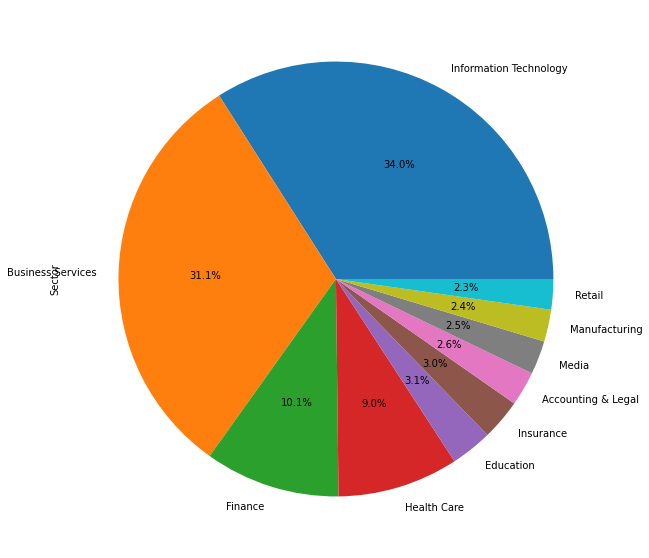

In [144]:
df_sectors = data.Sector.value_counts().dropna().sort_values(ascending=False).head(n=10)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
df_sectors.plot.pie(autopct='%1.1f%%');

In [147]:
Job_openings = data['Job Title'].value_counts()[:15]
Job_openings

Data Analyst               426
Senior Data Analyst        121
Junior Data Analyst         30
Business Data Analyst       28
Data Analyst II             17
Data Quality Analyst        17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst III            11
Data Analyst I              11
Marketing Data Analyst       9
Data Management Analyst      8
Data Warehouse Analyst       8
Name: Job Title, dtype: int64

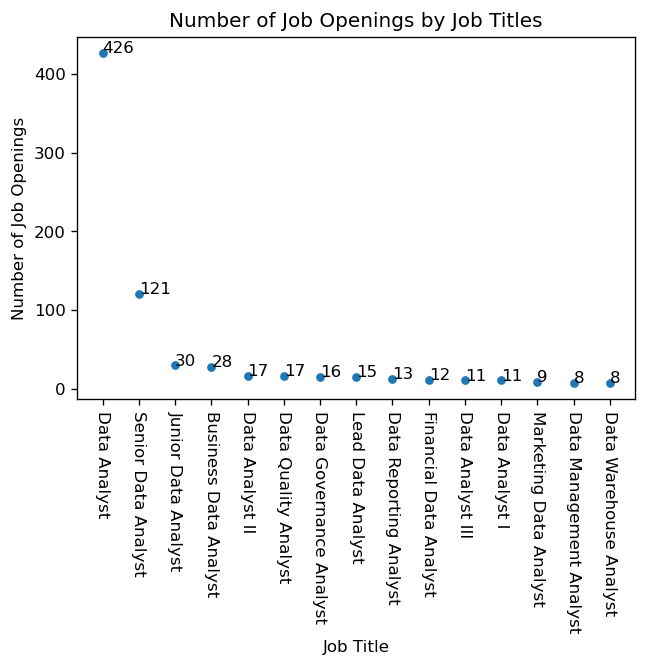

In [148]:
plt.figure(figsize=(6, 4), dpi=(120))
sns.scatterplot(x=Job_openings.index, y=Job_openings.values)
plt.title("Number of Job Openings by Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Number of Job Openings")
for i, ii in enumerate(Job_openings):
    plt.text(i, ii, str(ii))
plt.xticks(rotation=270);

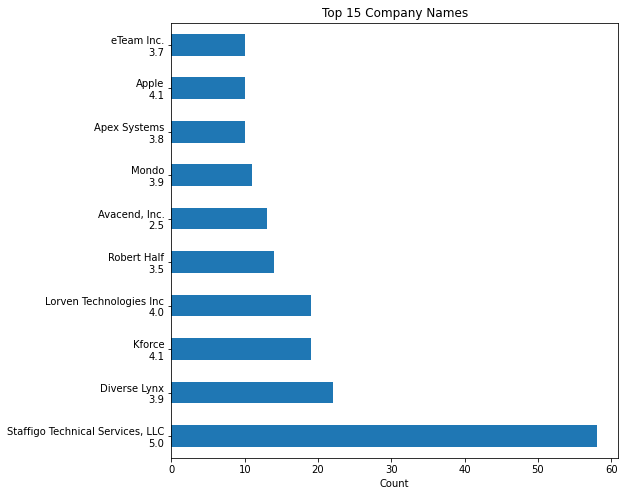

In [158]:
plt.figure(figsize=(8,8))
g = data["Company Name"].value_counts().nlargest(10).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

# 5.	Add random date column in data, with date range from 1 Jan 2020 to 1 July 2021 and make date wise chart with job posted count.

In [162]:
data["Date"] = np.random.choice(pd.date_range('2020-01-01', '2021-07-01'), len(data))

In [163]:
data

,JobID,Job Title,Salary Estimate,NumberofReviews,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,No.OFApplicants,Salary Minimum,Salary Maximum,Date
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),86,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,TRUE,728,37.0,66.0,2021-03-20
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),192,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,378,37.0,66.0,2020-08-25
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),84,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,354,37.0,66.0,2020-12-17
3,3,Data Analyst,$37K-$66K (Glassdoor est.),116,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,108,37.0,66.0,2020-04-20
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),196,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE,524,37.0,66.0,2021-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),66,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,290,78.0,104.0,2020-11-24
2252,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),70,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,402,78.0,104.0,2020-10-09
2253,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),144,NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,78.0,104.0,2020-10-30
2254,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),145,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,737,78.0,104.0,2021-01-13


In [208]:
data["MinSize"] = data["Size"].str.replace('to',' ').str[:5].str.replace('+','').str.replace('employees','').str.strip()
data["MaxSixe"] = data["Size"].str.lstrip('to').str[7:].str.replace('+','').str.replace('employees','').str.strip()

In [209]:
data

,JobID,Job Title,Salary Estimate,NumberofReviews,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,Easy Apply,No.OFApplicants,Salary Minimum,Salary Maximum,Date,MinSize,MaxSixe
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),86,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,...,Non-Profit,$100 to $500 million (USD),NaN,TRUE,728,37.0,66.0,2021-03-20,201,500
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),192,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,...,Health Care,$2 to $5 billion (USD),NaN,NaN,378,37.0,66.0,2020-08-25,10000,
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),84,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,...,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,354,37.0,66.0,2020-12-17,1001,5000
3,3,Data Analyst,$37K-$66K (Glassdoor est.),116,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,...,Information Technology,$50 to $100 million (USD),NaN,NaN,108,37.0,66.0,2020-04-20,201,500
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),196,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,...,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE,524,37.0,66.0,2021-01-24,501,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),66,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,...,Business Services,Unknown / Non-Applicable,NaN,NaN,290,78.0,104.0,2020-11-24,51,00
2252,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),70,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,...,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,402,78.0,104.0,2020-10-09,10000,
2253,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),144,NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75,78.0,104.0,2020-10-30,NaN,NaN
2254,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),145,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,...,Information Technology,$25 to $50 million (USD),NaN,NaN,737,78.0,104.0,2021-01-13,201,500


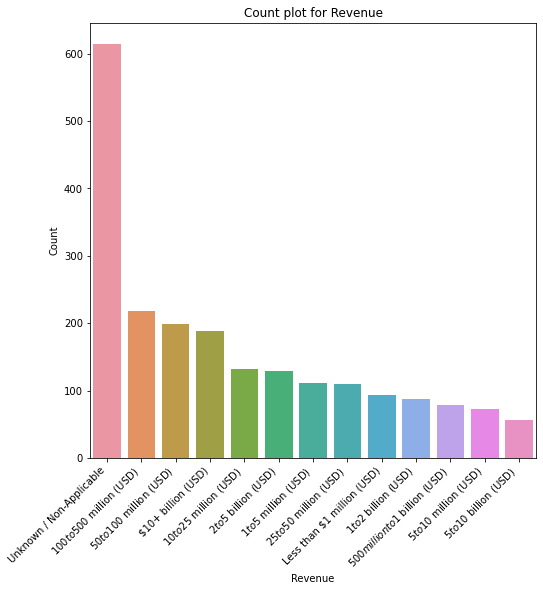

In [212]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=data, order = data['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [213]:
data

,JobID,Job Title,Salary Estimate,NumberofReviews,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,Easy Apply,No.OFApplicants,Salary Minimum,Salary Maximum,Date,MinSize,MaxSixe
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),86,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,...,Non-Profit,$100 to $500 million (USD),NaN,TRUE,728,37.0,66.0,2021-03-20,201,500
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),192,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,...,Health Care,$2 to $5 billion (USD),NaN,NaN,378,37.0,66.0,2020-08-25,10000,
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),84,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,...,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,354,37.0,66.0,2020-12-17,1001,5000
3,3,Data Analyst,$37K-$66K (Glassdoor est.),116,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,...,Information Technology,$50 to $100 million (USD),NaN,NaN,108,37.0,66.0,2020-04-20,201,500
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),196,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,...,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE,524,37.0,66.0,2021-01-24,501,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),66,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,...,Business Services,Unknown / Non-Applicable,NaN,NaN,290,78.0,104.0,2020-11-24,51,00
2252,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),70,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,...,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,402,78.0,104.0,2020-10-09,10000,
2253,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),144,NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75,78.0,104.0,2020-10-30,NaN,NaN
2254,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),145,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,...,Information Technology,$25 to $50 million (USD),NaN,NaN,737,78.0,104.0,2021-01-13,201,500


In [214]:
data['Easy Apply'] = data['Easy Apply'].replace('NaN','False')

In [215]:
data

,JobID,Job Title,Salary Estimate,NumberofReviews,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,Easy Apply,No.OFApplicants,Salary Minimum,Salary Maximum,Date,MinSize,MaxSixe
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),86,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,...,Non-Profit,$100 to $500 million (USD),NaN,TRUE,728,37.0,66.0,2021-03-20,201,500
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),192,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,...,Health Care,$2 to $5 billion (USD),NaN,NaN,378,37.0,66.0,2020-08-25,10000,
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),84,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,...,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,354,37.0,66.0,2020-12-17,1001,5000
3,3,Data Analyst,$37K-$66K (Glassdoor est.),116,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,...,Information Technology,$50 to $100 million (USD),NaN,NaN,108,37.0,66.0,2020-04-20,201,500
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),196,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,...,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE,524,37.0,66.0,2021-01-24,501,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),66,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,...,Business Services,Unknown / Non-Applicable,NaN,NaN,290,78.0,104.0,2020-11-24,51,00
2252,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),70,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,...,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,402,78.0,104.0,2020-10-09,10000,
2253,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),144,NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75,78.0,104.0,2020-10-30,NaN,NaN
2254,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),145,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,...,Information Technology,$25 to $50 million (USD),NaN,NaN,737,78.0,104.0,2021-01-13,201,500
